<a href="https://colab.research.google.com/github/jubijos/Exploratory_analysis_pharmaceuticals/blob/main/Exploratory_concentrations_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aims

* Exploratory data analysis of the occurrence of pharmaceuticals in WWTPs worldwide
* Antibiotic analysis: active pharmaceuticals, removing efficiency
* Additoin of some interesting features (for next analysis)

# Importing libraries

In [2]:
# Importando os pacotes
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Importing dataset, initial preparation

In [3]:
# Importando os dados da literatura
literatura = pd.read_csv("/content/sample_data/dadosdaliteratura2 - Concentracoes.csv", sep = ',', low_memory=False)

# Excluindo coluna "fonte" dos dados da literatura e alterando nome de colunas
literatura = literatura.drop(['Fonte'], axis=1)
literatura.columns = ['Principioativo', 'classeterapeutica','cent','csai','efremocao','tecnica','Local']

# Converter colunas para numeric
literatura[['cent', 'csai','efremocao']] = literatura[['cent', 'csai','efremocao']].apply(pd.to_numeric)

# Verifica a quantidade de observações de cada PA
literatura.groupby('Principioativo').size().sort_values(ascending = False)

literatura.head()

,Principioativo,classeterapeutica,cent,csai,efremocao,tecnica,Local
0,Diclofenaco,Anti inflamatório,131.61,8.1,94.0,digestor anaeróbio + tanque anóxico,Portugal
1,Diclofenaco,Anti inflamatório,601.00,3.2,46.8,Lodo ativado,China
2,Eritromicina,Antibiótico,254.24,153.0,39.8,Lodo ativado,China
3,Sulfametoxazol,Antibiótico,2935.40,1147.9,60.9,Lodo ativado,China
4,Sulfametoxazol,Antibiótico,2500.00,800.0,68.0,reator aeróbico,Canadá


In [4]:
# Inserir coluna de continente na base.

literatura.Local.value_counts()

# ÁSIA: China, Japão, Índia, Coreia do Sul, Turquia
# AMÉRICA: Brasil, Canadá, Estados Unidos, México, Chile, Canada, Colômbia
# EUROPA: Espanha, Reino Unido, Holanda, Itália, Grécia, Polônia, França, Áustria, República Tcheca, Alemanha, Portugal
# África: Quênia

China               157
Japão               109
Canadá               92
Brasil               74
Turquia              72
Espanha              69
Reino Unido          59
Índia                38
Estados Unidos       38
Holanda              32
Itália               31
Grécia               24
Polônia              23
México               22
França               20
Áustria              19
Coreia do Sul        17
República Tcheca     13
Quênia               12
Alemanha              8
Portugal              5
Chile                 4
Colômbia              2
Name: Local, dtype: int64

In [ ]:
literatura.tecnica.value_counts()

In [6]:
# Cria as condições, depois valores e depois a coluna

condicao = [
    (literatura['Local'] == 'China')|(literatura['Local'] == 'Japão')|
    (literatura['Local'] == 'Índia')|(literatura['Local'] == 'Coreia do Sul')|
    (literatura['Local'] == 'Turquia'),
    (literatura['Local'] == 'Brasil')|(literatura['Local'] == 'Canadá')|
    (literatura['Local'] == 'Estados Unidos')|(literatura['Local'] == 'México')|
    (literatura['Local'] == 'Chile')|(literatura['Local'] == 'Canada')|
    (literatura['Local'] == 'Colômbia'),
    (literatura['Local'] == 'Espanha')|(literatura['Local'] == 'Reino Unido')|
    (literatura['Local'] == 'Holanda')|(literatura['Local'] == 'Itália')|
    (literatura['Local'] == 'Grécia')|(literatura['Local'] == 'Polônia')|
    (literatura['Local'] == 'França')|(literatura['Local'] == 'Áustria')|
    (literatura['Local'] == 'República Tcheca')|(literatura['Local'] == 'Alemanha')|
    (literatura['Local'] == 'Portugal'),
    (literatura['Local'] == 'Quênia')
    ]

valores = ['Ásia', 'América', 'Europa', 'África']

literatura['continente'] = np.select(condicao, valores)

In [7]:
literatura.shape
literatura.info
literatura.describe()

,cent,csai,efremocao
count,940.000000,940.000000,940.000000
mean,3737.912968,877.338511,12.608851
std,17078.449212,4429.644037,228.530061
min,0.320000,0.000000,-5451.780000
25%,119.750000,47.075000,6.070000
50%,344.000000,152.000000,47.055000
75%,1169.250000,446.250000,80.262500
max,260495.000000,94230.000000,100.000000


In [8]:
literatura.groupby(['classeterapeutica']).describe().T

classeterapeutica  Anti inflamatório   Antibiótico  Droga psiquiátrica
cent      count           417.000000    356.000000          167.000000
          mean           6845.089185   1160.955955         1472.668743
          std           24483.569502   4992.637125         7120.437775
          min               0.390000      0.320000            1.400000
          25%             221.000000     98.900000           79.200000
          50%             806.000000    204.000000          300.000000
          75%            2448.000000    532.000000          585.000000
          max          260495.000000  72700.000000        83620.000000
csai      count           417.000000    356.000000          167.000000
          mean            938.395084    928.695365          615.400599
          std            3149.177049   6247.327546         1609.335804
          min               0.030000      0.000000            1.400000
          25%              47.000000     39.825000           89.500000
          50%             164.000000     92.300000          260.000000
          75%             530.000000    338.000000          560.500000
          max           43813.000000  94230.000000        12891.600000
efremocao count           417.000000    356.000000          167.000000
          mean             45.388765      1.209846          -44.943114
          std              96.676831    314.674021          232.231365
          min           -1022.220000  -5451.780000        -1930.200000
          25%              27.190000     12.362500          -30.165000
          50%              67.100000     44.475000            0.000000
          75%              92.440000     70.012500           24.200000
          max              99.930000    100.000000           99.680000

In [ ]:
# Verificar quantidade de obs que apresentam % de remoção < 0 (ou seja, a concentração do PA aumentou, formou metabólitos)

literatura[(literatura['efremocao'])<0].value_counts().sum()

198

In [ ]:
# Verificando quantas obs com % de remoção < 0 tem em cada classe terapêutica

df_efneg = literatura.query("efremocao < 0")
df_efneg.groupby('classeterapeutica').describe().T # 64 obs com % de remoção negativas em antibióticos

classeterapeutica  Anti inflamatório   Antibiótico  Droga psiquiátrica
cent      count            51.000000     64.000000           83.000000
          mean           1439.560784    916.948281          393.417831
          std            5219.694778   2511.628241          480.752156
          min               0.400000      4.400000            1.400000
          25%              89.700000     39.750000           59.100000
          50%             280.000000    141.000000          240.000000
          75%             820.500000    364.750000          535.000000
          max           36750.000000  12070.000000         2461.700000
csai      count            51.000000     64.000000           83.000000
          mean           1948.786275   2617.118750          657.281928
          std            6246.020319  11996.564893         1488.932512
          min               1.200000      6.600000            2.000000
          25%             122.050000     94.750000          118.000000
          50%             490.000000    306.000000          320.000000
          75%            1210.000000    721.750000          680.000000
          max           43813.000000  94230.000000        12891.600000
efremocao count            51.000000     64.000000           83.000000
          mean           -108.269216   -236.778281         -126.868795
          std             209.242740    696.052077          307.754189
          min           -1022.220000  -5451.780000        -1930.200000
          25%             -99.730000   -163.692500          -53.830000
          50%             -28.890000    -50.765000          -30.540000
          75%             -13.580000    -23.962500          -13.695000
          max              -0.600000     -0.240000           -2.780000

In [10]:
df_efpos= literatura.query("efremocao >= 0")
df_efpos.groupby('classeterapeutica').describe().Tc

classeterapeutica  Anti inflamatório   Antibiótico  Droga psiquiátrica
cent      count           366.000000    292.000000           84.000000
          mean           7598.318552   1214.437089         2539.071429
          std           25977.285864   5387.657364         9942.697400
          min               0.390000      0.320000            1.400000
          25%             238.500000    104.750000           96.000000
          50%             870.000000    222.500000          350.000000
          75%            2692.800000    574.750000          762.500000
          max          260495.000000  72700.000000        83620.000000
csai      count           366.000000    292.000000           84.000000
          mean            797.602869    558.629966          574.017857
          std            2407.547821   3961.188738         1728.070052
          min               0.030000      0.000000            1.400000
          25%              41.275000     34.000000           50.000000
          50%             145.250000     81.450000          245.500000
          75%             437.750000    251.750000          381.500000
          max           28147.000000  64900.000000        11870.000000
efremocao count           366.000000    292.000000           84.000000
          mean             66.800123     53.371627           36.007262
          std              29.933230     26.856470           30.782417
          min               0.000000      0.610000            0.000000
          25%              45.327500     32.195000           11.485000
          50%              74.405000     55.735000           24.200000
          75%              93.542500     75.000000           57.200000
          max              99.930000    100.000000           99.680000

China, Japan, Canada and Brazil are the most recurrent countries. We can see that the dataset presents high variability for all therapeutic classes. It is noteworthy that 198 instances present a negative removing rate which represents the formation of metabolites or accumulation of compounds during the treatment process. However, this will not be considered since it does not represent a natural tendency. Based on that, I created a new data frame "df_efpos" regarding instances with removing eficciency equal or higher than 0. Thus, the total number of instances reduced to 742.  

# Gráficos Exploratórios

Text(0.5, 0.98, 'Obs com ef. de remoção positivas')

<Figure size 1500x1200 with 0 Axes>

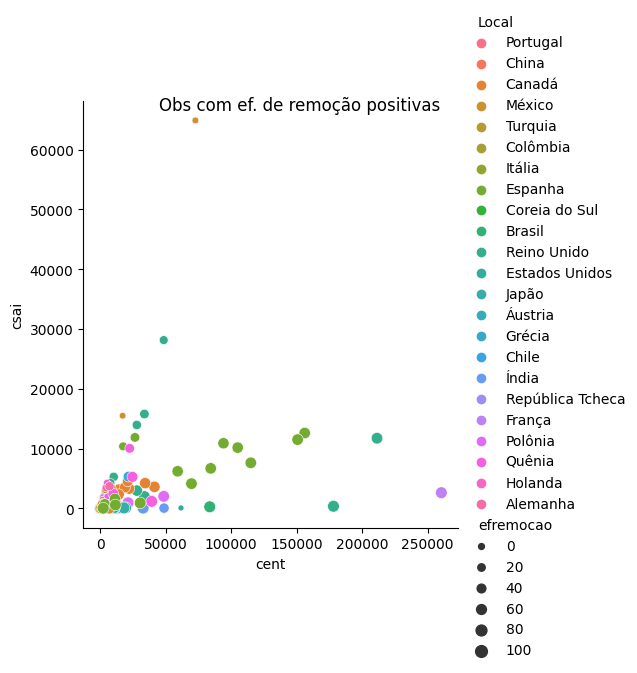

In [ ]:
# Visualizando concentração de entrada x concentração de saída

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'Local', size = 'efremocao', data=df_efpos).fig.suptitle('Obs com ef. de remoção positivas')

Text(0.5, 0.98, 'Obs com ef. de remoção positivas')

<Figure size 1500x1200 with 0 Axes>

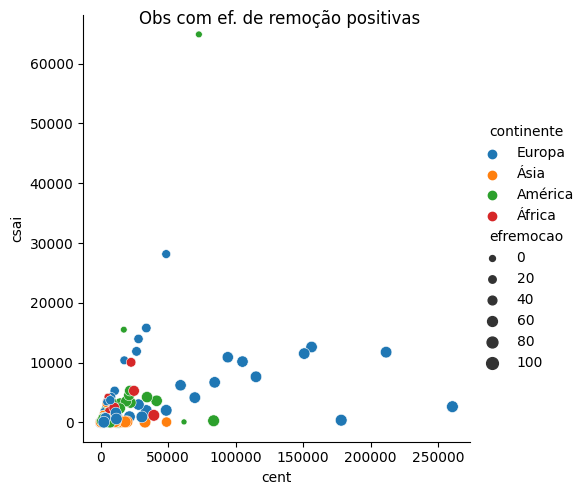

In [ ]:
plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'continente', size = 'efremocao', data=df_efpos).fig.suptitle('Obs com ef. de remoção positivas')

Text(0.5, 0.98, 'Obs com ef. de remoção positivas')

<Figure size 1500x1200 with 0 Axes>

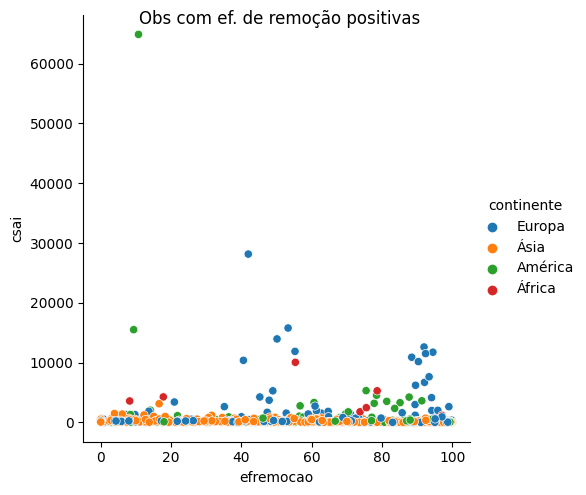

In [12]:
# Ef. de remoção x concentração de saída por continente


plt.figure(figsize=(15,12))
sns.relplot(x='efremocao', y='csai', hue = 'continente', data=df_efpos).fig.suptitle('Obs com ef. de remoção positivas')

As we can observe, the majority of observations are related to European monitoring. Also, there is a clear relationship that shows that the bigger the affluent concentration, bigger the effluent concentration despite some outliers. The higher concentrations (both inlet and outlet) are from Europe.
One can see that many observations regarding America or Europe happen to middle to higher removing efficiency (above 50%).  

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

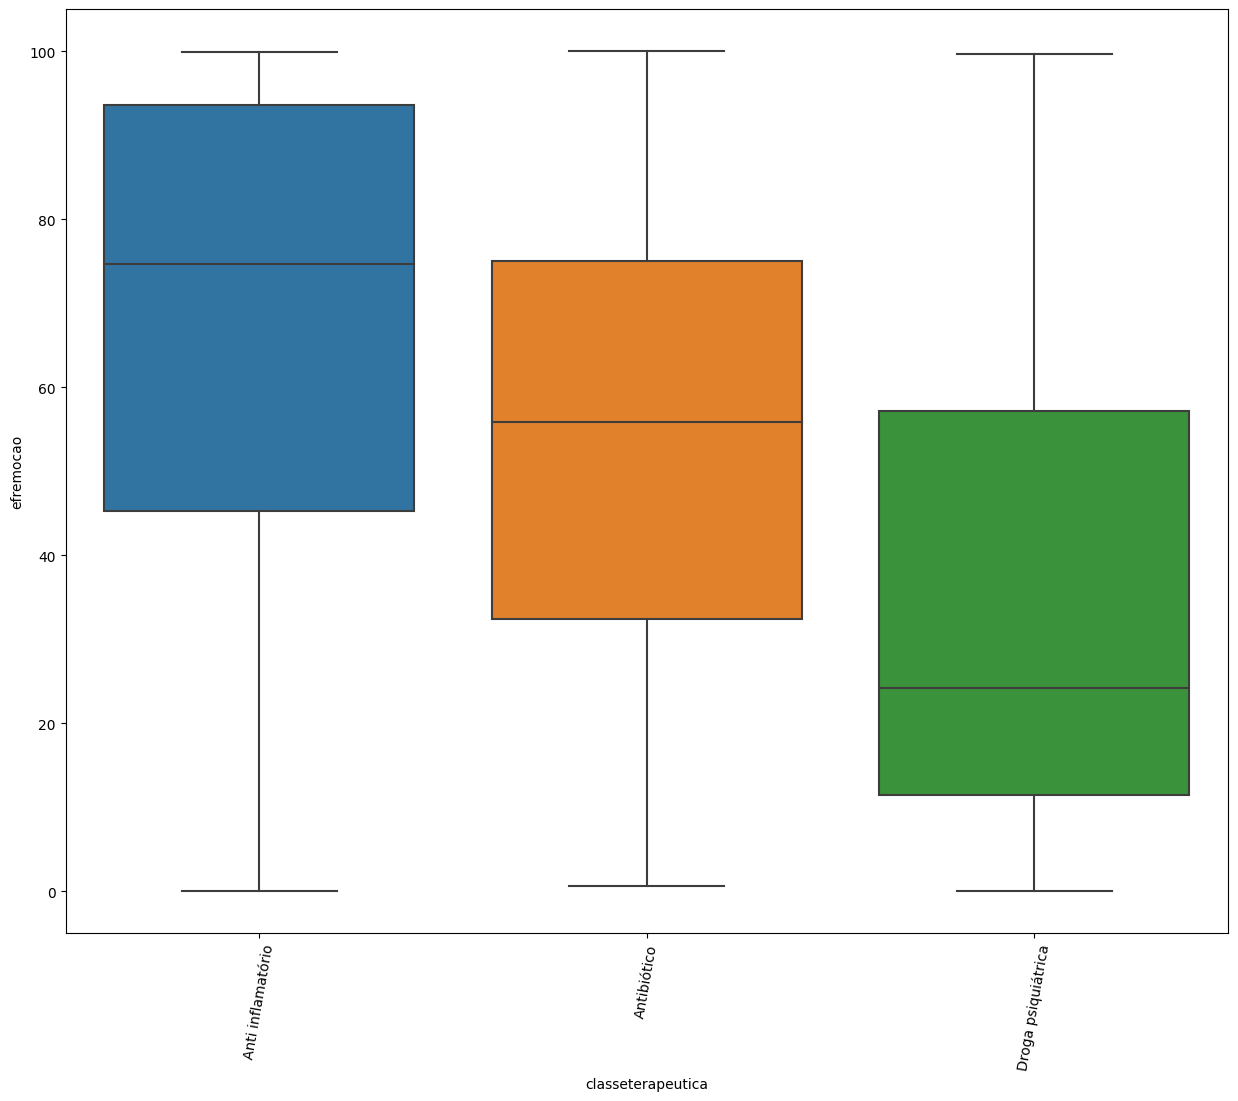

In [ ]:
# Visualizando as ef. de remoção positivas por classe terapêuticas

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', data=df_efpos)
plt.xticks(rotation=80)

This boxplot confirms that anti inflammatory drugs presents the higher removing rate, and most than a half of observations achieve a median value near 80% of removing. Antibiotics, which are resistant to the treatment, achieve a median removing rate of 60%. Psiquiatric drugs present the lower removing rate, with a median about 20%, a low efficiency. However, we can check the affluent and effluent concentrations by therapeutical class to see if they entered at the same level of concentration.

<Figure size 1500x1200 with 0 Axes>

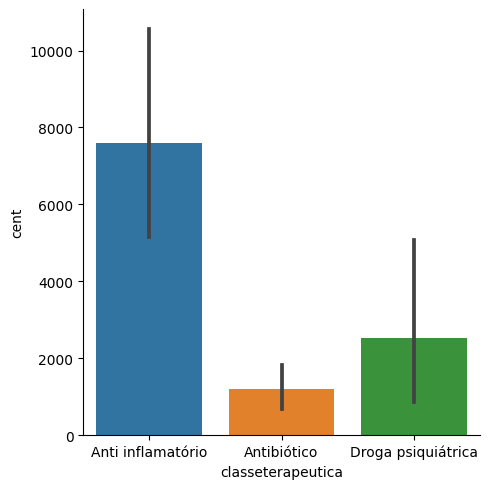

<Figure size 1500x1200 with 0 Axes>

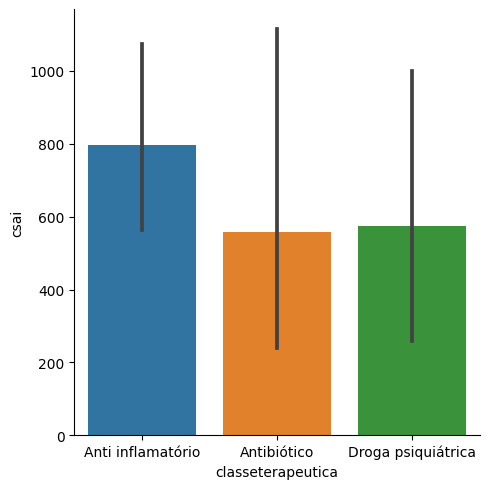

In [11]:
plt.figure(figsize=(15,12))
sns.catplot(x='classeterapeutica', y='cent', kind = 'bar', data=df_efpos)

plt.figure(figsize=(15,12))
sns.catplot(x='classeterapeutica', y='csai', kind = 'bar', data=df_efpos)

Check that! Anti inflammatory enter in the treatment with higher affluent concentration (almost 8000 ng/L). However, after the process the effluent concentrations are about 800 ng/L. This shows a high effectiveness of removing process. Antibiotics present affluent concentrations about 1000 ng/L and at the end of the process the effluent concentrations are about 600 ng/L. This means that they are extremely resistants to the removing process. Psiquiatric drugs present a better trend of removing than antibiotics: enter in the processes with affluent concentrations about 2000 ng/L, and the effluent concentration about 600 ng/L. Although, we know by the previous graph that the removing rate of that therapeutical class achieved maximun of 60% of removing rate. So we can see that antibiotics entered the process with lower levels compared to Anti inflammatory and psiquiatric drugs. However, antibiotics effluent concentration are only slightly lower than the effluent concentration of psychiatric drugs.

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

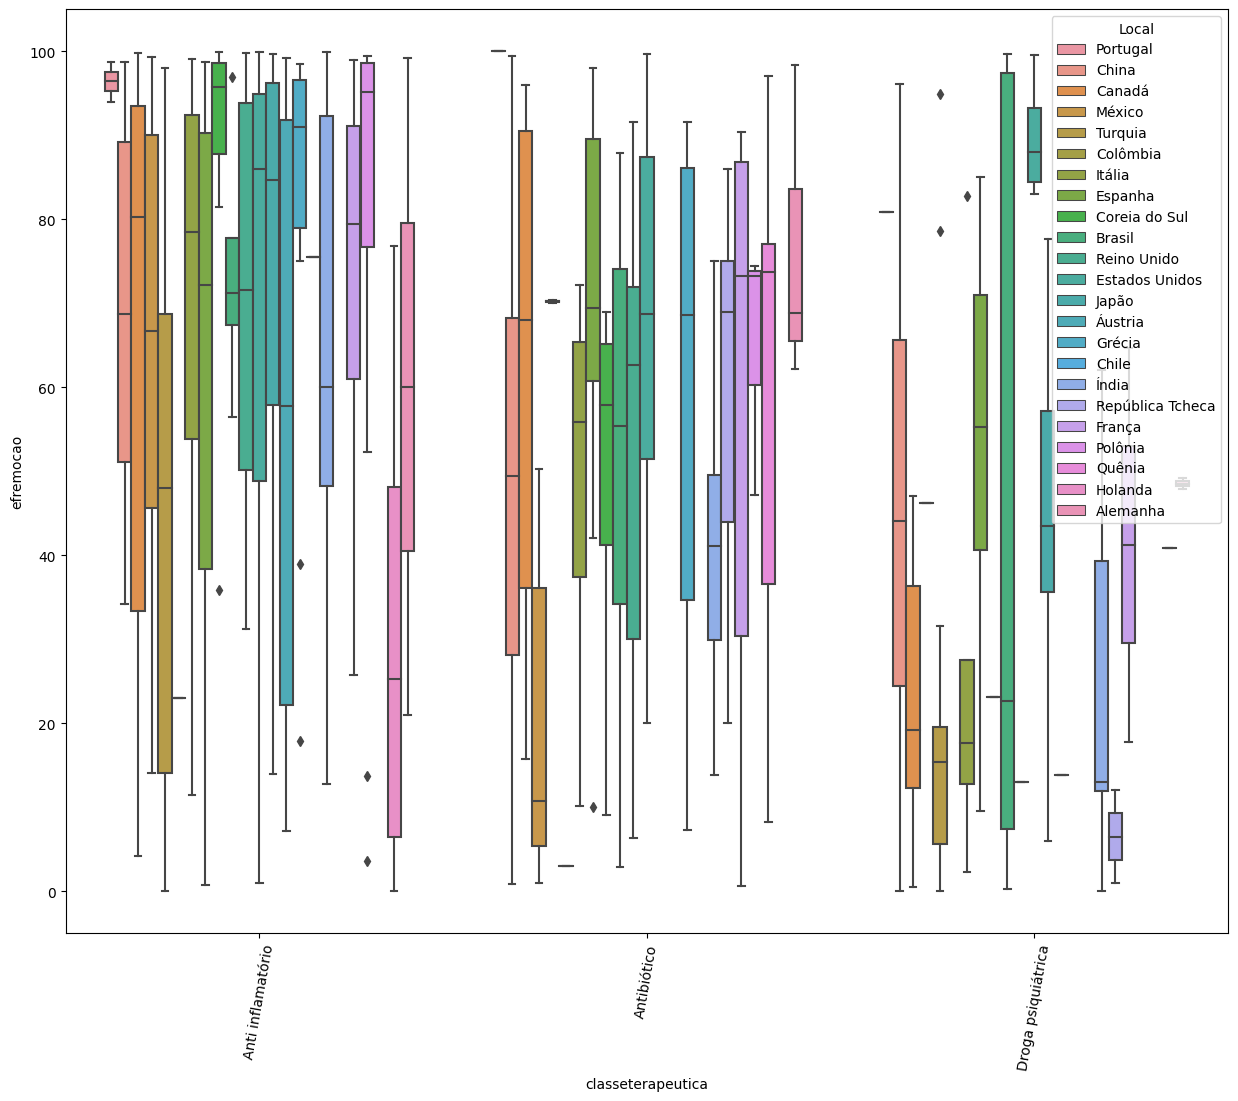

In [ ]:
# Boxplot apenas para as ef. de remoção + - plotar legenda fora do gráfico

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'Local', data=df_efpos)
plt.xticks(rotation=80)

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

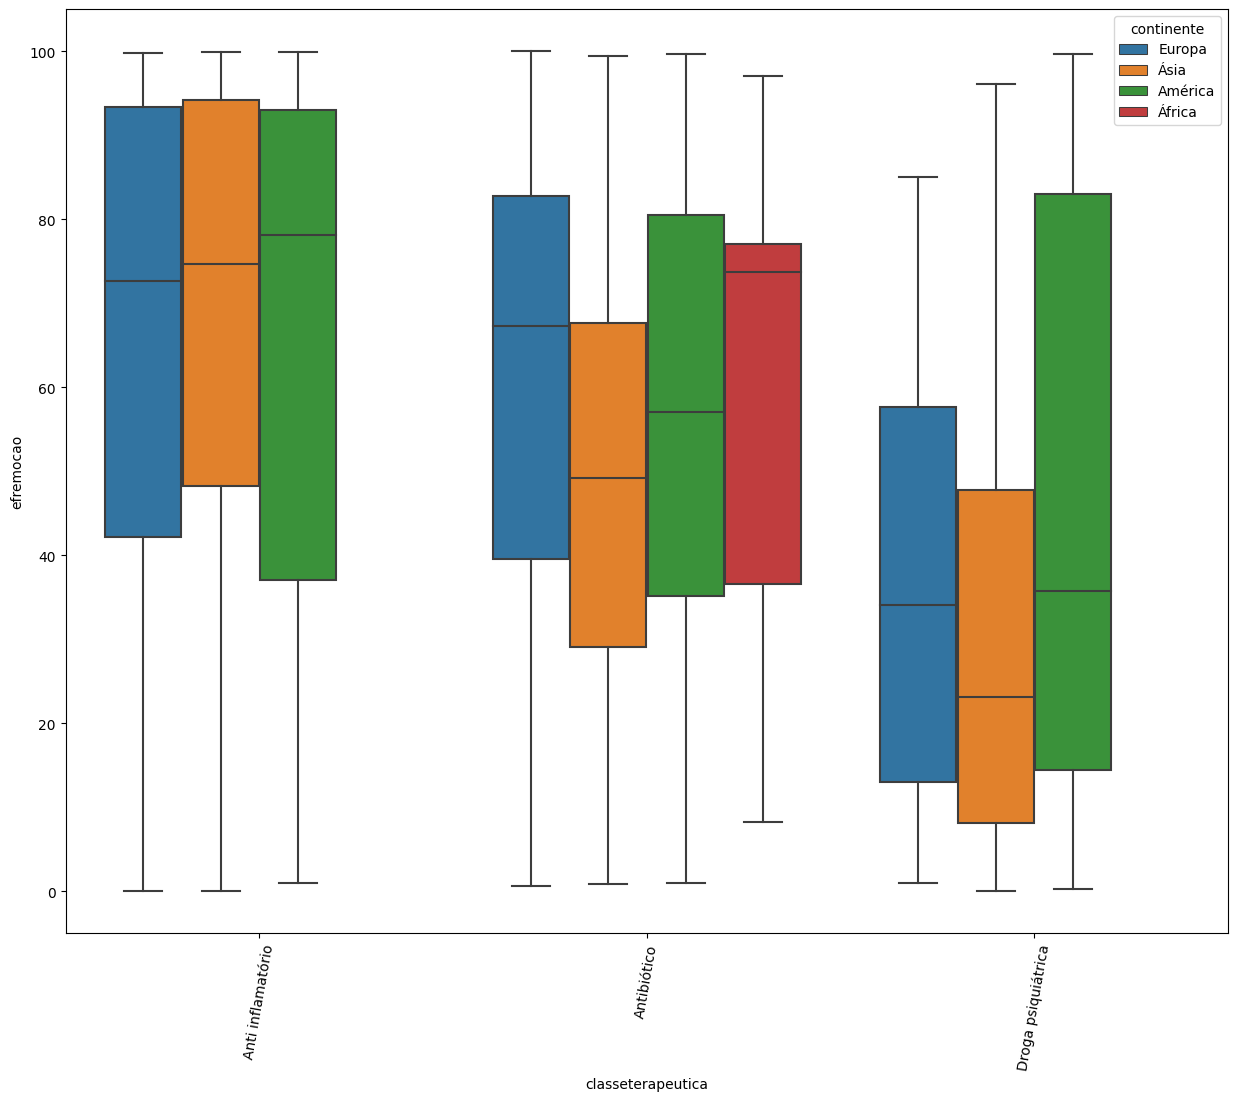

In [ ]:
# Ef. de remoção + por continente

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'continente', data=df_efpos)
plt.xticks(rotation=80)

One can see a high variability of removing effciency regarding country or continent. However, we can still see the sequence of anti inflammatory > antibiotics > psichiatric drugs for the removing rate. For antibiotic, Asia and Africa has the lower removing rate, probably countries as Turkey and Quenia as we can see on the country boxplot.

In [ ]:
# Saber os 10 países mais recorrentes na base de ef. de rem. positiva

n = 10
df_efpos['Local'].value_counts()[:n].sort_values(ascending=False)

China             131
Japão             100
Canadá             69
Brasil             59
Espanha            51
Turquia            46
Reino Unido        39
Índia              35
Estados Unidos     33
Itália             27
Name: Local, dtype: int64

In [ ]:
# Agora, extrair os top 10 países mais recorrentes na base.

paises = ['China', 'Japão', 'Canadá', 'Brasil', 'Espanha', 'Turquia', 'Reino Unido', 'Índia', 'Estados Unidos', 'Itália']

df_efpos_top10 = df_efpos[df_efpos['Local'].isin(paises)]

In [ ]:
df_efpos_top10.describe()

,cent,csai,efremocao
count,590.000000,590.000000,590.000000
mean,4357.253966,577.688492,58.036898
std,18104.384430,2004.870605,29.792174
min,0.900000,0.100000,0.000000
25%,127.000000,34.025000,34.867500
50%,370.500000,110.500000,60.780000
75%,1177.000000,343.500000,85.390000
max,211380.000000,28147.000000,99.930000


In order to better visualization I decided to follow the analysis considering the ten most recurrent countries. So I created a new data frame.

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

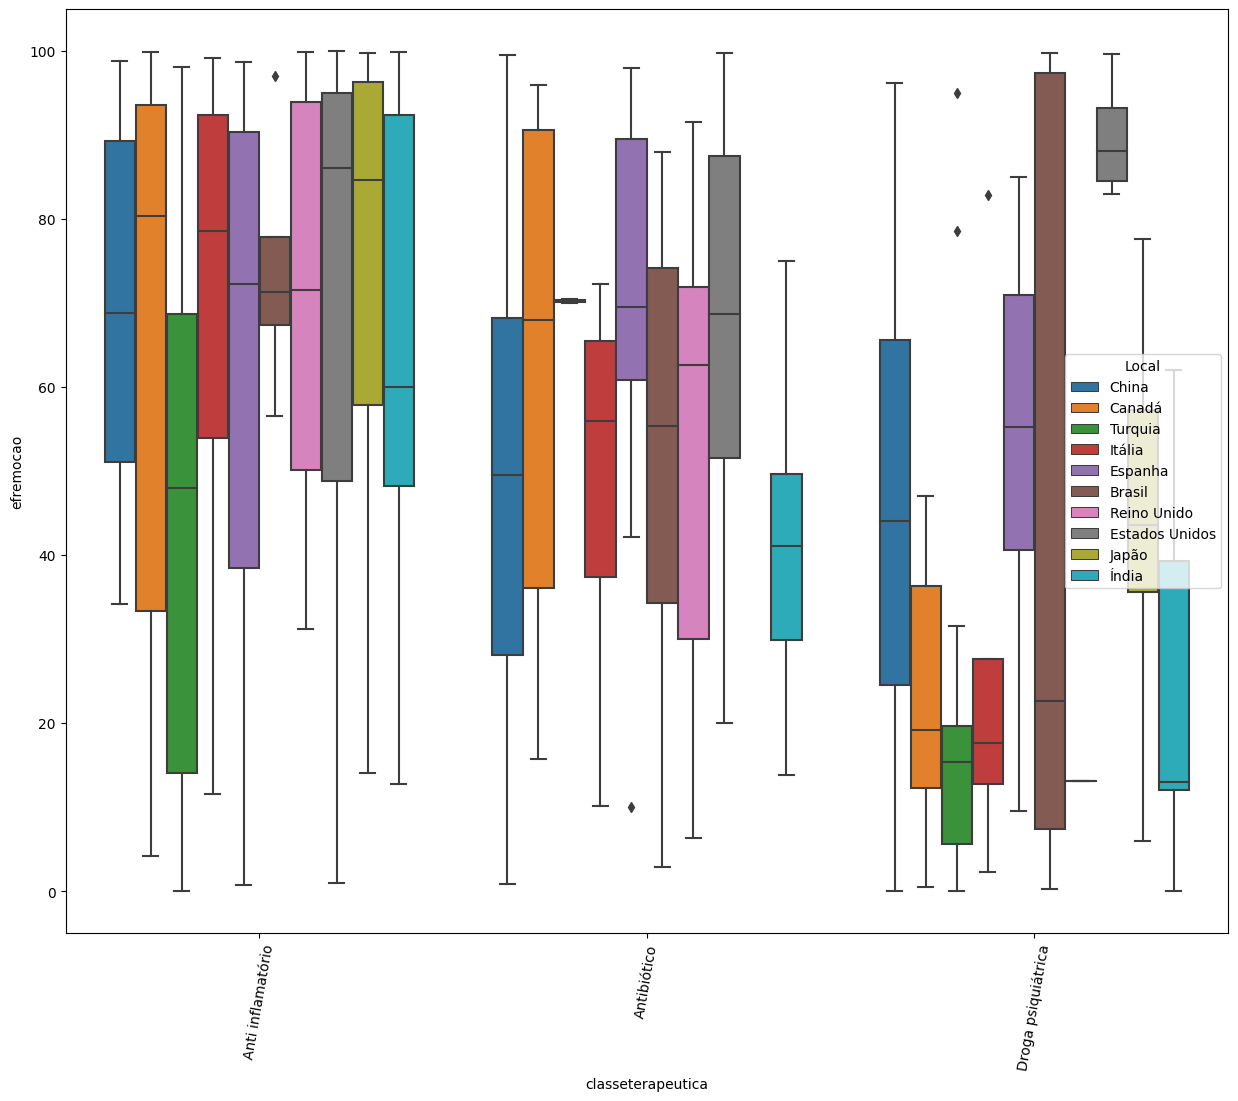

In [ ]:
# Boxplot para ef. de remoção + para os 10 países que mais aparecem na base - plotar legednda fora do gráfico

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'Local', data=df_efpos_top10)
plt.xticks(rotation=80)

For anti inflammatories Turkey and Canada present lower removing efficiency. For antibiotics, China, India and United Kingdom present lower removing rates. And for psichiatric drugs, Turkey and Canada present lower removing rates. Note the high variability, especially Brasil for psychiatric drugs. This shows that the experiments of the authors resulted in different levels of results.

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

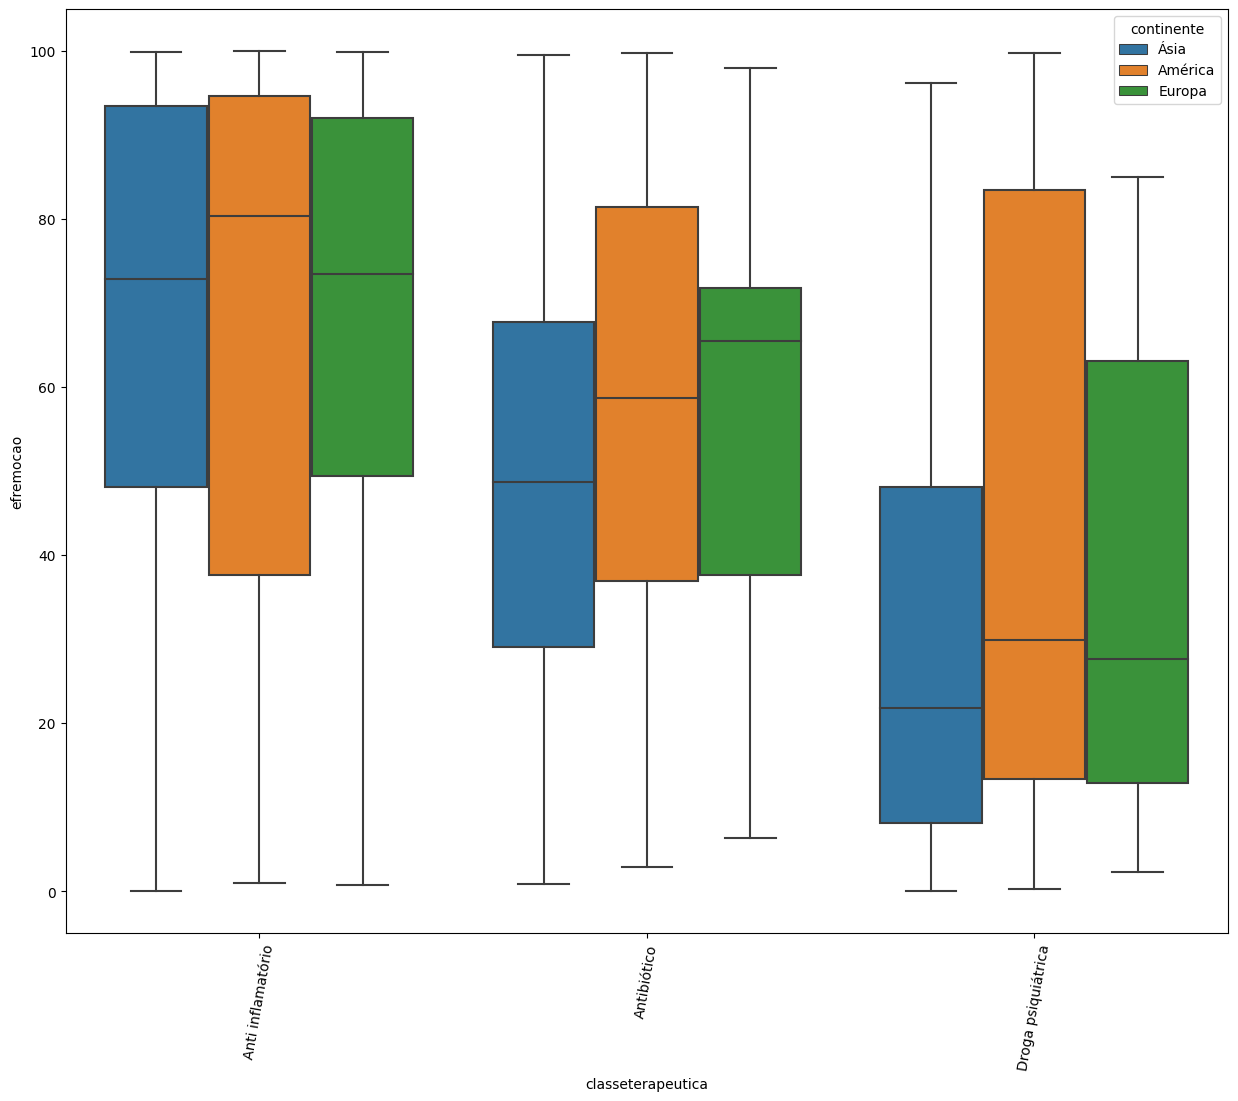

In [ ]:
# Boxplot para ef. de remoção + para os 10 países POR CONTINENTE que mais aparecem na base - plotar legednda fora do gráfico

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'continente', data=df_efpos_top10)
plt.xticks(rotation=80)

In [ ]:
df_efpos_top10.describe()

,cent,csai,efremocao
count,590.000000,590.000000,590.000000
mean,4357.253966,577.688492,58.036898
std,18104.384430,2004.870605,29.792174
min,0.900000,0.100000,0.000000
25%,127.000000,34.025000,34.867500
50%,370.500000,110.500000,60.780000
75%,1177.000000,343.500000,85.390000
max,211380.000000,28147.000000,99.930000


We can see that the values of features are not well distributed. Also, we are dealing with different orders of magnitude. That's why we need to scale this data and also look for outliers and remove them. To do this, I will use the Interquartile Distance.

In [ ]:
# Pegar para a base positiva e excluir valores discrepantes, usando a regra interquartil por coluna numérica

# Cálculo de IQR

Q1 = df_efpos['cent'].quantile(.25)

Q3 = df_efpos['cent'].quantile(.75)

IQR = Q3 - Q1

IQR

1259.0

In [ ]:
# Limite superior

LS = Q3 + 1.5*IQR
LI = Q1 - 1.5*IQR

print("Limite superior:", LS)
print("Limite inferior:", LI)

Limite superior: 3288.5
Limite inferior: -1747.5


In [ ]:
# Removendo os valores que estão fora desse range

# Fazendo uma cópia do datset inicial

df_efpos_limpos = df_efpos.copy()

# Removendo os outliers
df_efpos_limpos.drop(df_efpos_limpos[df_efpos_limpos['cent'] > 3288.5].index,axis =0, inplace = True)

To better visualize, I will create categories to represent the removing efficieny.


Removing rates from:
0 - 20,9% - negligible  
21 - 40,9% - low  
41 - 59,9 - moderate  
60% a 79,9% - conventional e   
80% advanced

In [ ]:
# Criando nova coluna de Categoria de remoção

condicao = [
    (df_efpos_limpos['efremocao'] >= 0) & (df_efpos_limpos['efremocao'] <= 20.9),
    (df_efpos_limpos['efremocao'] >= 21) & (df_efpos_limpos['efremocao'] <= 40.9),
    (df_efpos_limpos['efremocao'] >= 41) & (df_efpos_limpos['efremocao'] <= 59.9),
    (df_efpos_limpos['efremocao'] >= 60) & (df_efpos_limpos['efremocao'] <= 79.9),
    (df_efpos_limpos['efremocao'] >= 80)
    ]

valores = ['Desprezível', 'Baixa', 'Moderada', 'Convencional', 'Avançada']

df_efpos_limpos['categoria_remocao'] = np.select(condicao, valores)

(array([0, 1, 2]),
 [Text(0, 0, 'Europa'), Text(1, 0, 'Ásia'), Text(2, 0, 'América')])

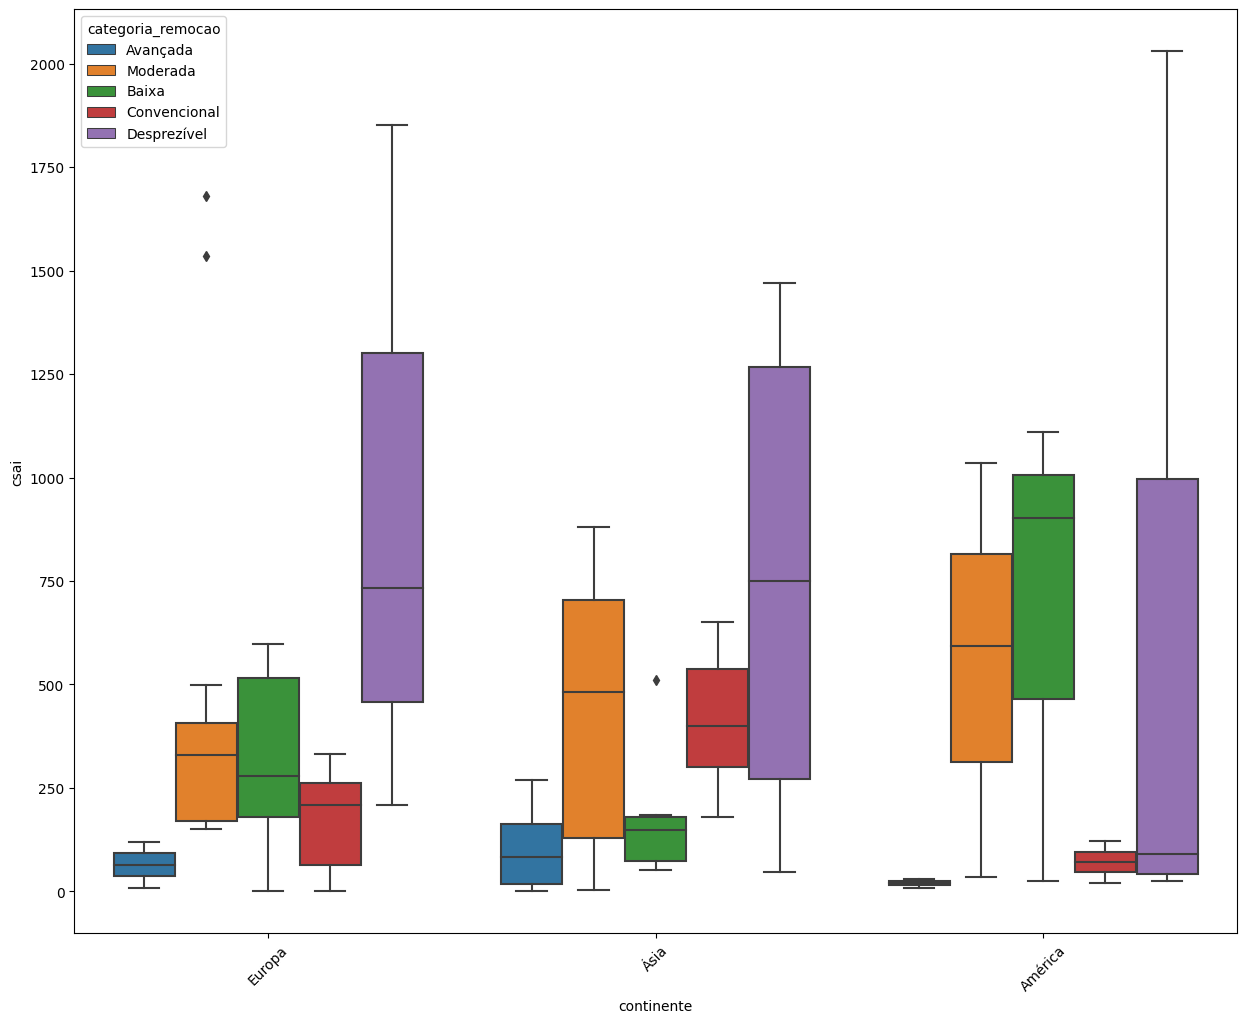

In [ ]:
# boxplot ef de remoção x continente x categoria de remoção

df_antif = df_efpos_limpos.query("classeterapeutica == 'Anti inflamatório'")
df_diclo = df_antif.query("Principioativo == 'Diclofenaco'")

plt.figure(figsize=(15,12))
sns.boxplot(x='continente', y='csai', hue = 'categoria_remocao', data=df_diclo)
plt.xticks(rotation = 45)

As we can see, higher effluent concentrations are due negligible removing rates. And in blue we can see the lower effluent concentrations due to advanced removing rate. Look that the moderate removing rate in Europe achieved lower concentrations than in Asia and America. Lower removing rate for Asia, in green, achieved lower concentrations than in Europe and America. Probably, the affluent concentration in Asia was in a low level compared to the other continents. Overall, the effluent concentrations about maximum 500 ng/L for Europe are less dispersed than for Asia e America, except the negligible category. Now we can check the trend for each active compound.

## Visualizando a distribuição de cada classe terapêutica separada e depois por PA daquela classe

**Antibióticos**

In [ ]:
# Antibióticos

df_antibio = df_efpos_limpos.query("classeterapeutica == 'Antibiótico'") # selecionando só antibióticos da base com ef. remoção > 0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Eritromicina'),
  Text(1, 0, 'Sulfametoxazol'),
  Text(2, 0, 'Ampicilina'),
  Text(3, 0, 'Trimetoprima'),
  Text(4, 0, 'Claritromicina'),
  Text(5, 0, 'Roxitromicina'),
  Text(6, 0, 'Azitromicina'),
  Text(7, 0, 'Moxifloxacina'),
  Text(8, 0, 'Ofloxacino'),
  Text(9, 0, 'Norfloxacino'),
  Text(10, 0, 'Sulfametoxazol '),
  Text(11, 0, 'Lincomicina'),
  Text(12, 0, 'Metronidazol'),
  Text(13, 0, 'Ciprofloxacino '),
  Text(14, 0, 'Norfloxacino '),
  Text(15, 0, 'Cefalexina '),
  Text(16, 0, 'Tetraciclina'),
  Text(17, 0, 'Ácido mefenâmico'),
  Text(18, 0, 'Ciprofloxacino'),
  Text(19, 0, 'Amoxicilina'),
  Text(20, 0, 'Enrofloxacino'),
  Text(21, 0, 'Doxiciclina'),
  Text(22, 0, 'Oxitetraciclina'),
  Text(23, 0, 'sulfadiazina'),
  Text(24, 0, 'Levofloxacino'),
  Text(25, 0, 'Sulfapiridina'),
  Text(26, 0, 'Sulfasalasina'),
  Text(27

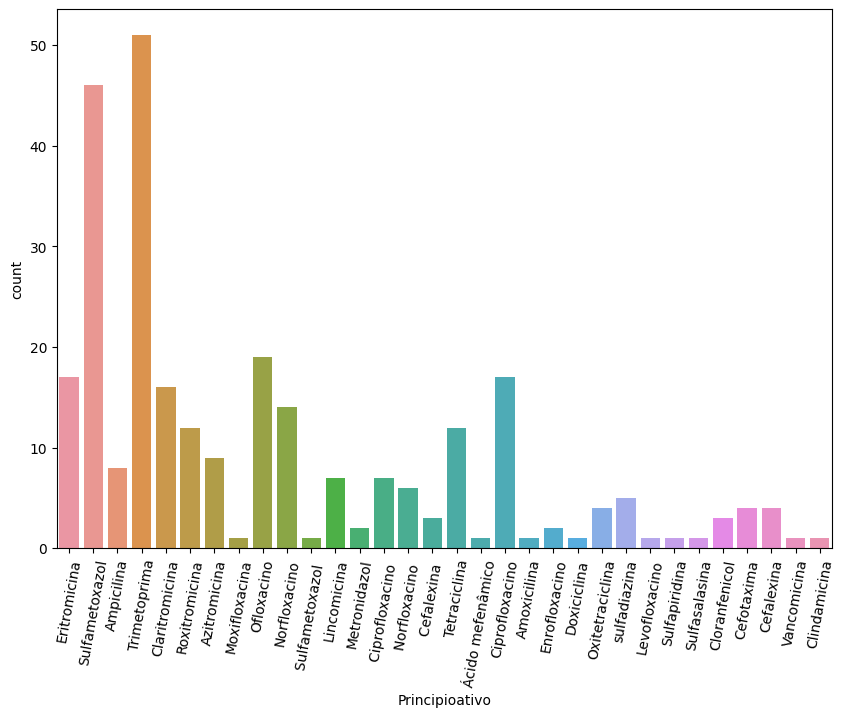

In [ ]:
# Visualizando

plt.figure(figsize=(10,7))
sns.countplot(x = df_antibio['Principioativo'])
plt.xticks(rotation=80)

Based on that, I will proceed the analysis for the most important antibiotics according to my studies. That's why I'm gonna focus in six antibiotics.

In [ ]:
# Verificar qtde de obs apenas para os antibióticos de interesse

df_antibio_main = df_antibio[(df_antibio['Principioativo']== 'Amoxicilina')|
                             (df_antibio['Principioativo']== 'Cefalexina')|
                             (df_antibio['Principioativo']== 'Ciprofloxacino')|
                             (df_antibio['Principioativo']== 'Norfloxacino')|
                             (df_antibio['Principioativo']== 'Claritromicina')|
                             (df_antibio['Principioativo']== 'Ofloxacino')|
                             (df_antibio['Principioativo']== 'Ampicilina')
                             ]

df_antibio_main['Principioativo'].value_counts().sum() # Apenas 79 observações. Usar o mesmo artifício da carbamazepina

79

In [ ]:
# Separando apenas dados com % de remoção > 0

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'Continente', size = 'efremocao', data=df_antibiotio_main).fig.suptitle('Obs com ef. de remoção positivas')

From now on, we gonna use this new data frame, which brings 79 observations. I will consider the treatment remving technique applied. For this, I standardized the names, added other features of interest (for a next analysis) and than updated the dataset.


# Padronizando os tipos de técnicas.


In [ ]:
# Importando os dados da literatura
antibioticos = pd.read_csv("/content/sample_data/antibioticos2 - antibioticos.csv", sep = ',', low_memory=False)
antibioticos

,ano,cent_anvisa,qt vendida,n por un vendida,Principioativo,classeterapeutica,cent,csai,efremocao,Fatorexcrecao,massatot_kg_anual,tecnica,Local,continente
0,2014,937.141552,21743,245832,Ampicilina,Antibiótico,430.00,0.00,100.00,0.40,164.429000,digestor anaeróbio tanque anóxico,Portugal,Europa
1,2014,957.342813,99588,1216082,Claritromicina,Antibiótico,0.32,0.31,3.00,0.20,394.783250,tratamentoprimário floculação coagulação sedi...,Colômbia,América
2,2014,2.583672,15026,53430,Ofloxacino,Antibiótico,345.90,57.90,82.80,0.90,0.225390,Lodo ativado,China,Ásia
3,2014,7611.550793,178115,913196,Norfloxacino,Antibiótico,203.00,30.40,85.00,0.70,895.989200,Lodo ativado,China,Ásia
4,2014,957.342813,99588,1216082,Claritromicina,Antibiótico,1012.00,281.60,72.17,0.20,394.783250,Lodo ativado,Itália,Europa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2020,19341.487195,408037,1537974,Ciprofloxacino,Antibiótico,2789.00,257.00,90.78,0.64,2525.340895,Lodo ativado,Estados Unidos,América
549,2020,564.383927,50688,525202,Claritromicina,Antibiótico,136.00,66.00,51.47,0.20,260.251900,Lodo ativado,Estados Unidos,América
550,2020,3208.227213,77106,489184,Norfloxacino,Antibiótico,1500.00,25.00,98.33,0.70,381.315600,Lodo ativado,Alemanha,Europa
551,2020,3.134948,16288,53785,Ofloxacino,Antibiótico,180.00,68.00,62.22,0.90,0.244320,Lodo ativado,Alemanha,Europa


In [ ]:
antibioticos.tecnica.value_counts()

Lodo ativado                                              413
Terciário SAGR                                             56
Biofiltro                                                  21
Lodo ativado CMB BAC                                       21
UASB Lodo ativado                                          14
Terciário carvão ativo                                     14
digestor anaeróbio tanque anóxico                           7
tratamentoprimário floculação  coagulação sedimentação      7
Name: tecnica, dtype: int64

Text(0.5, 0.98, 'Conc x entrada x ef. de remoção')

<Figure size 1500x1200 with 0 Axes>

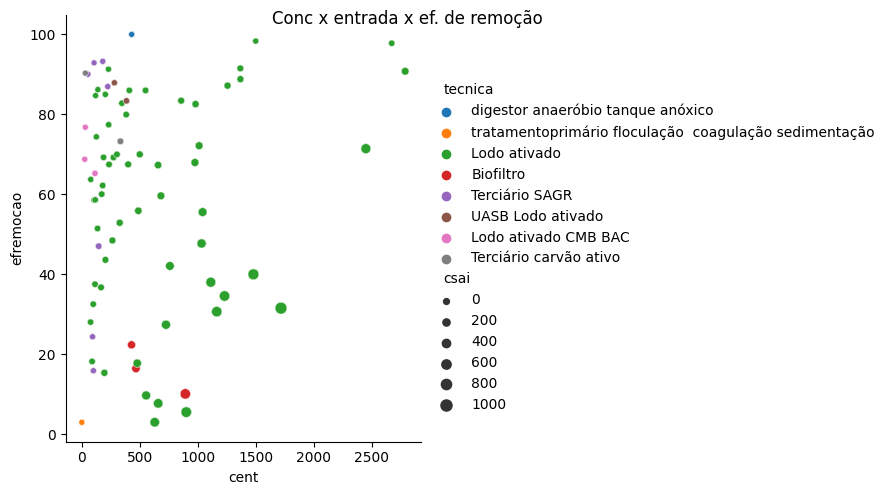

In [ ]:
# Considerando a ef. de remoção

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='efremocao', hue = 'tecnica', size='csai', data=antibioticos).fig.suptitle('Conc x entrada x ef. de remoção x técnica')

Activated slugde is the ost reccurrent treatment so it's completely dispersed regarding the removing efficiency. However, we can see that the primary treatment in yellow shows an removing efficiency of almost 0, corroboring with the theoretical studies. In this sense, Tertiary treatment or associated treatment as seen in purple, pink, blue, brown and grey achieve higher removing efficiencies so as the literature says. Now I'm gonna do the same thing I did before: I will create categories of removing rate so I can see it for each of the active compounds considered.

In [ ]:
# Criando nova coluna de Categoria de remoção (mesma coisa que fiz lá em cima)

condicao = [
    (antibioticos['efremocao'] >= 0) & (antibioticos['efremocao'] <= 20.9),
    (antibioticos['efremocao'] >= 21) & (antibioticos['efremocao'] <= 40.9),
    (antibioticos['efremocao'] >= 41) & (antibioticos['efremocao'] <= 59.9),
    (antibioticos['efremocao'] >= 60) & (antibioticos['efremocao'] <= 79.9),
    (antibioticos['efremocao'] >= 80)
    ]

valores = ['Desprezível', 'Baixa', 'Moderada', 'Convencional', 'Avançada']

antibioticos['categoria_remocao'] = np.select(condicao, valores)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Ampicilina'),
  Text(1, 0, 'Claritromicina'),
  Text(2, 0, 'Ofloxacino'),
  Text(3, 0, 'Norfloxacino'),
  Text(4, 0, 'Ciprofloxacino'),
  Text(5, 0, 'Amoxicilina'),
  Text(6, 0, 'Cefalexina')])

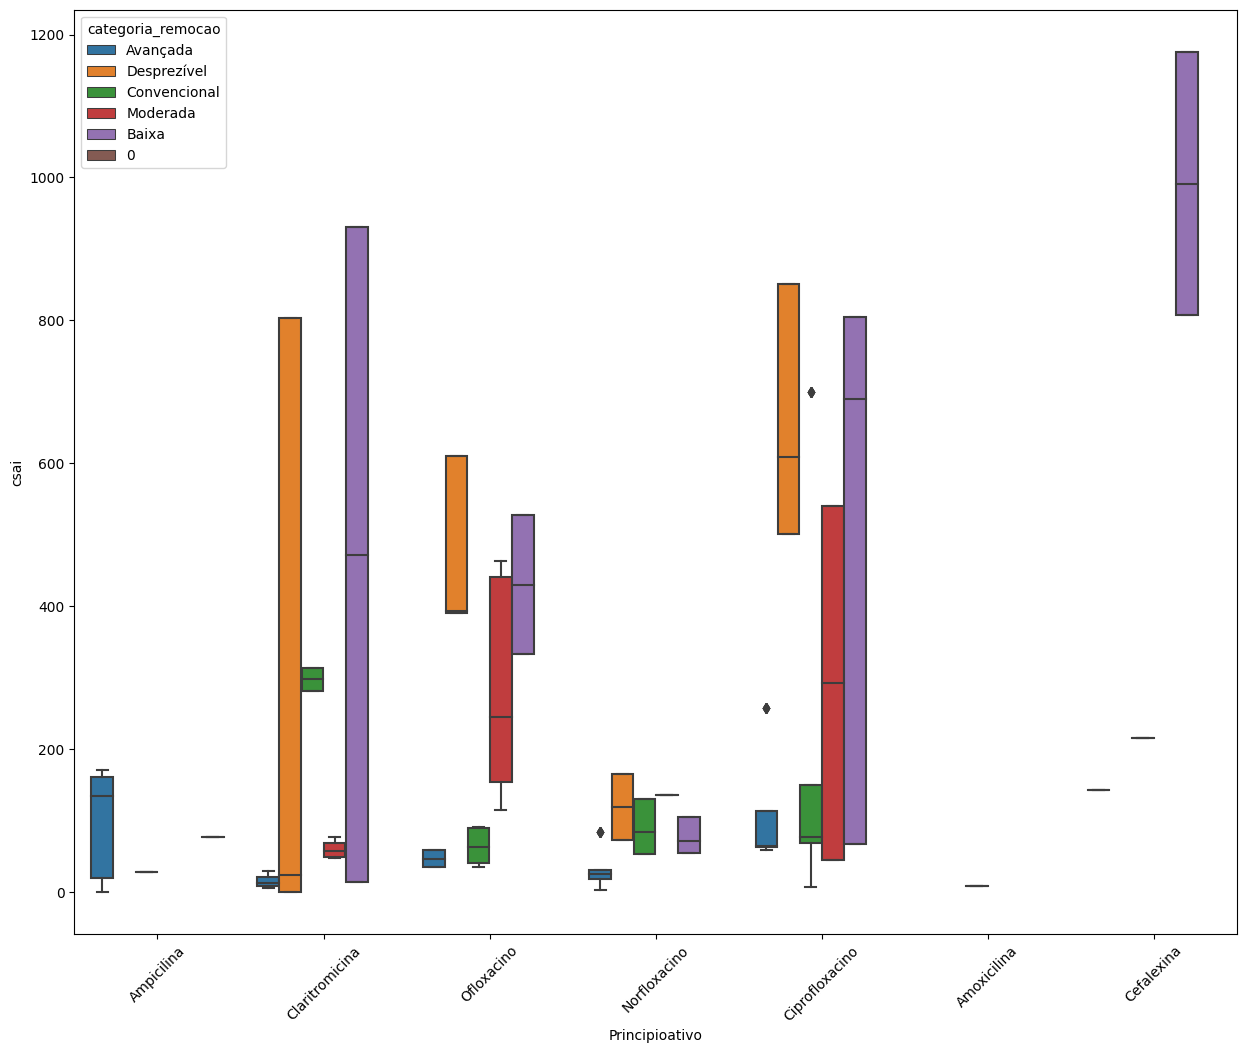

In [ ]:
# boxplot ef de remoção x PA x categoria de remoção

plt.figure(figsize=(15,12))
sns.boxplot(x='Principioativo', y='csai', hue = 'categoria_remocao', data=antibioticos)
plt.xticks(rotation = 45)

Check that clarithromycin, ciprofloxacin and cefalexyn present high variability in low and negligible removing rates, which leads to high effluent contrations. This indicates that these active compounds are resistant to the treatment since the variability indicates that different experiments led to different results.

In [ ]:
antibioticos.describe()

,ano,cent_anvisa,qt vendida,n por un vendida,cent,csai,efremocao,Fatorexcrecao,massatot_kg_anual
count,553.000000,553.000000,5.530000e+02,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,2017.000000,8465.818960,2.345516e+05,1.226841e+06,556.233165,211.667595,58.589367,0.576962,1360.242925
std,2.001811,12969.604362,2.954786e+05,2.303742e+06,590.227595,264.161720,27.501613,0.260597,2007.737680
min,2014.000000,2.583672,1.006800e+04,5.343000e+04,0.320000,0.000000,3.000000,0.200000,0.225390
25%,2015.000000,529.530151,1.804500e+04,1.268530e+05,136.000000,39.600000,36.750000,0.200000,80.012000
50%,2017.000000,1076.335001,9.730200e+04,9.084710e+05,333.000000,83.000000,65.260000,0.640000,403.599600
75%,2019.000000,12357.317493,4.080370e+05,1.537974e+06,857.000000,281.600000,83.430000,0.700000,2525.340895
max,2020.000000,87508.734396,1.535072e+06,2.172018e+07,2789.000000,1176.000000,100.000000,0.900000,17363.087100


Now I'm gonna establish category levels for the effluent concentration.

In [ ]:
# Estabelecer níveis da variável concent. de saída (csai):  até 100, entre 100 - 500 e acima de 500 (baixo, médio, alto)

condicao = [
    (antibioticos['csai'] >= 0) & (antibioticos['csai'] <= 100),
    (antibioticos['csai'] >= 100.1) & (antibioticos['csai'] <= 500),
    (antibioticos['csai'] >= 500.1)
    ]

valores = ['Baixa', 'Média', 'Alta']

antibioticos['categoria_csai'] = np.select(condicao, valores)

In [ ]:
antibioticos

## Reproduzindo gráficos

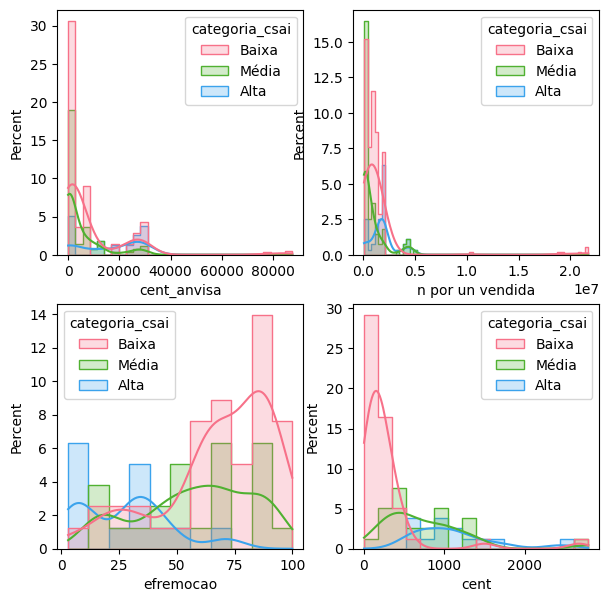

In [ ]:
# Histograma - variáveis independentes x nível da variável dependente (csai)


fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=antibioticos, x="cent_anvisa", kde=True, stat="percent", element = 'step', hue="categoria_csai", palette= 'husl', ax=axs[0, 0])
sns.histplot(data=antibioticos, x="n por un vendida", kde=True, stat="percent", element = 'step', hue="categoria_csai", palette= 'husl', ax=axs[0, 1])
sns.histplot(data=antibioticos, x="efremocao", kde=True, stat="percent", element = 'step', hue="categoria_csai", palette= 'husl', ax=axs[1, 0])
sns.histplot(data=antibioticos, x="cent", kde=True, stat="percent", element = 'step', hue="categoria_csai",palette= 'husl',ax=axs[1, 1])

plt.show()

Here I plotted the percentage of observations that relates with each effluent level category against some important variables I added previously in the data frame. We can see the higher occurrence regards low effluent concentration for every feature considered.

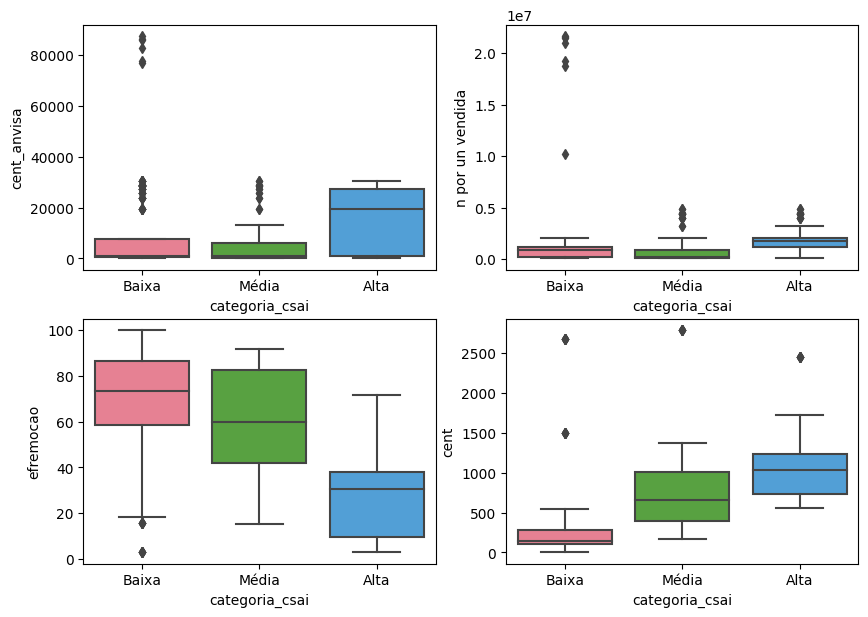

In [ ]:
# Boxplots

fig, axs = plt.subplots(2, 2, figsize=(10,7))

sns.boxplot(x='categoria_csai', y='cent_anvisa', orient = 'v',palette = "husl", data=antibioticos, ax=axs[0, 0])
sns.boxplot(x='categoria_csai', y='n por un vendida', orient = 'v',palette = "husl", data=antibioticos, ax=axs[0, 1])
sns.boxplot(x='categoria_csai', y='efremocao', orient = 'v',palette = "husl", data=antibioticos, ax=axs[1, 0])
sns.boxplot(x='categoria_csai', y='cent', orient = 'v',palette = "husl", data=antibioticos, ax=axs[1, 1])

plt.show()

For low levels of cent_anvisa we observe low levels of effluent concentration. For high levels of removing rate we observe low levels of concentration, low category (pink) and low levels of removing efficiency leads to high level of effluent concentration (blue). The same trend can be observed in cent (affluent concentration): the higher affluent levels leads to higher effluent levels.

# Finishing

This analysis showed that anti inflammatory drugs has great removing ability while Antibiotics and psychiatric drugs are resistent to the treatment. Also, we could see that higher affluent rates are associated with higher effluent rates. This same trend could be observed for the 06 antibiotics investigated at the end of the analysis. We also check that European effluent concentrations typically remain lower than effluent cocnentration from Asia and America. This can be associated with a fact found in literature: in general, developing coutries presents higher concentrations of pharmaceuticals active coumpounds since the commercialization is indiscriminated. Also, these countries lack mechanisms of controlling the sales and the occurrence in the enviroment. Clarythromycin, ciprofloxacin and cefalexin demonstrated a resistance to wastewater treatment. This shows that this active compounds needs to be monitored in order to reduce their occurrence levels since even post treatment they still are in considerable levels.